In [1]:
from pyspark.sql import SparkSession
from pyspark.sql import functions as F
import os
import sys
sys.path.append('.')
from lib.all import all_in_one

In [2]:
os.environ['PYSPARK_DRIVER_PYTHON_OPTS']= "notebook"
os.environ['PYSPARK_DRIVER_PYTHON'] = sys.executable
os.environ['PYSPARK_PYTHON'] = sys.executable

spark = SparkSession \
    .builder \
    .appName("renovation") \
    .getOrCreate()

In [5]:
# import files 
# File location and type
file_location_array = [
    {"location" : "./training/pred_dpe.csv", "name": "dpe", "delimiter": ","},
    {"location" : "./training/dico.csv", "name": "dictionary", "delimiter": "\t"}
]
file_type = "csv"

# CSV options
infer_schema = "true"
first_row_is_header = "true"
dataframes = {}

# The applied options are for CSV files. For other file types, these will be ignored.
for file in file_location_array:
    delimiter = file["delimiter"]
    file_location = file["location"]
    name = file["name"]
    dataframes[file["name"]] = (
        spark.read.format(file_type) \
        .option("inferSchema", infer_schema)
        .option("header", first_row_is_header)
        .option("sep", delimiter)
        .load(file_location)
    )

In [7]:
dpe_training = dataframes['dpe'].drop('GES_emission')
ges_training = dataframes['dpe'].drop('DPE_consumption')
dictionary = dataframes['dictionary']

In [8]:
#librairies
import numpy as np
import matplotlib.pyplot as plt

#usefull
from copy import deepcopy

#linear
from sklearn.linear_model import Ridge
from sklearn.linear_model import LogisticRegression

#random forest
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier

# XGboost
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingRegressor

# DPE

4
0 {'max_iter': 300, 'C': 1, 'class_weight': 'balanced'}
2 {'max_iter': 300, 'C': 100, 'class_weight': 'balanced'}
0.6162197545163588 {'max_iter': 300, 'C': 100, 'class_weight': 'balanced'}


KeyboardInterrupt: 

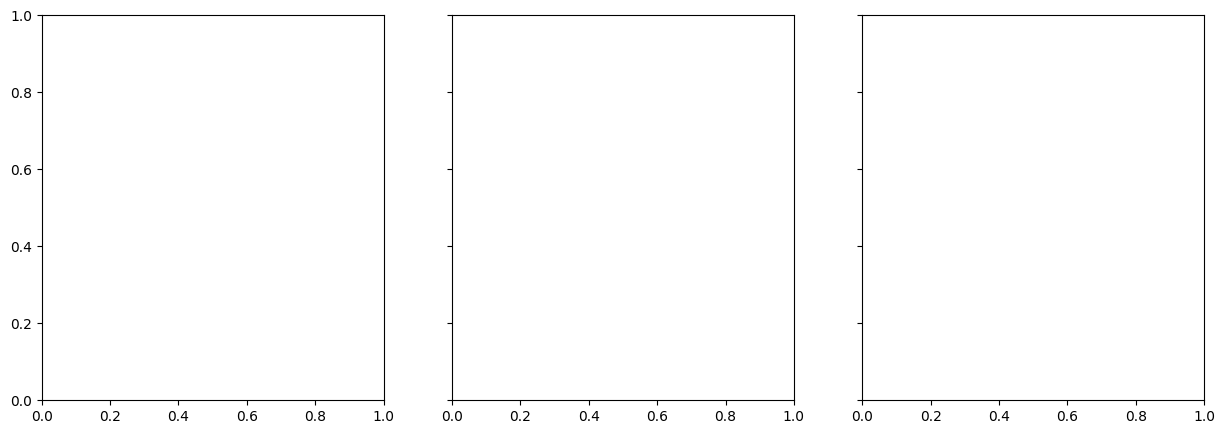

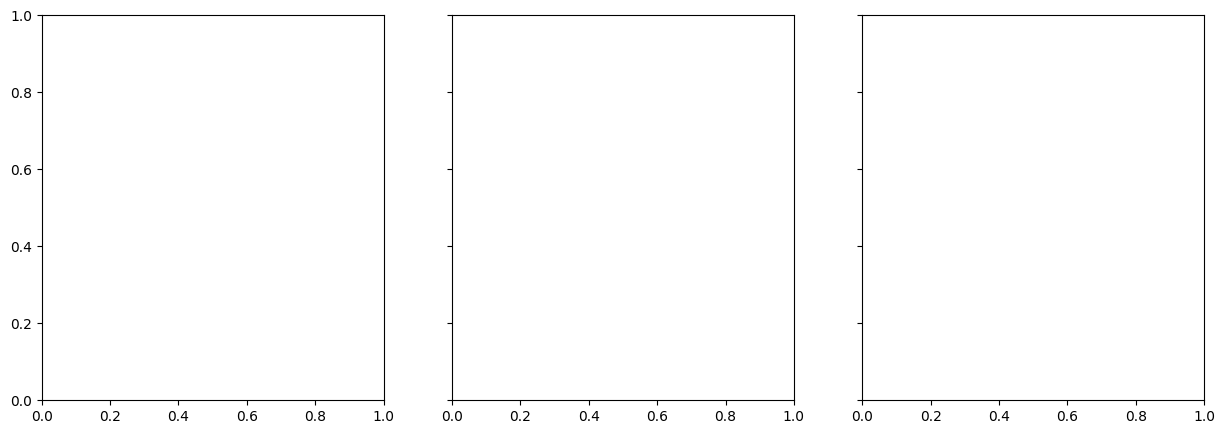

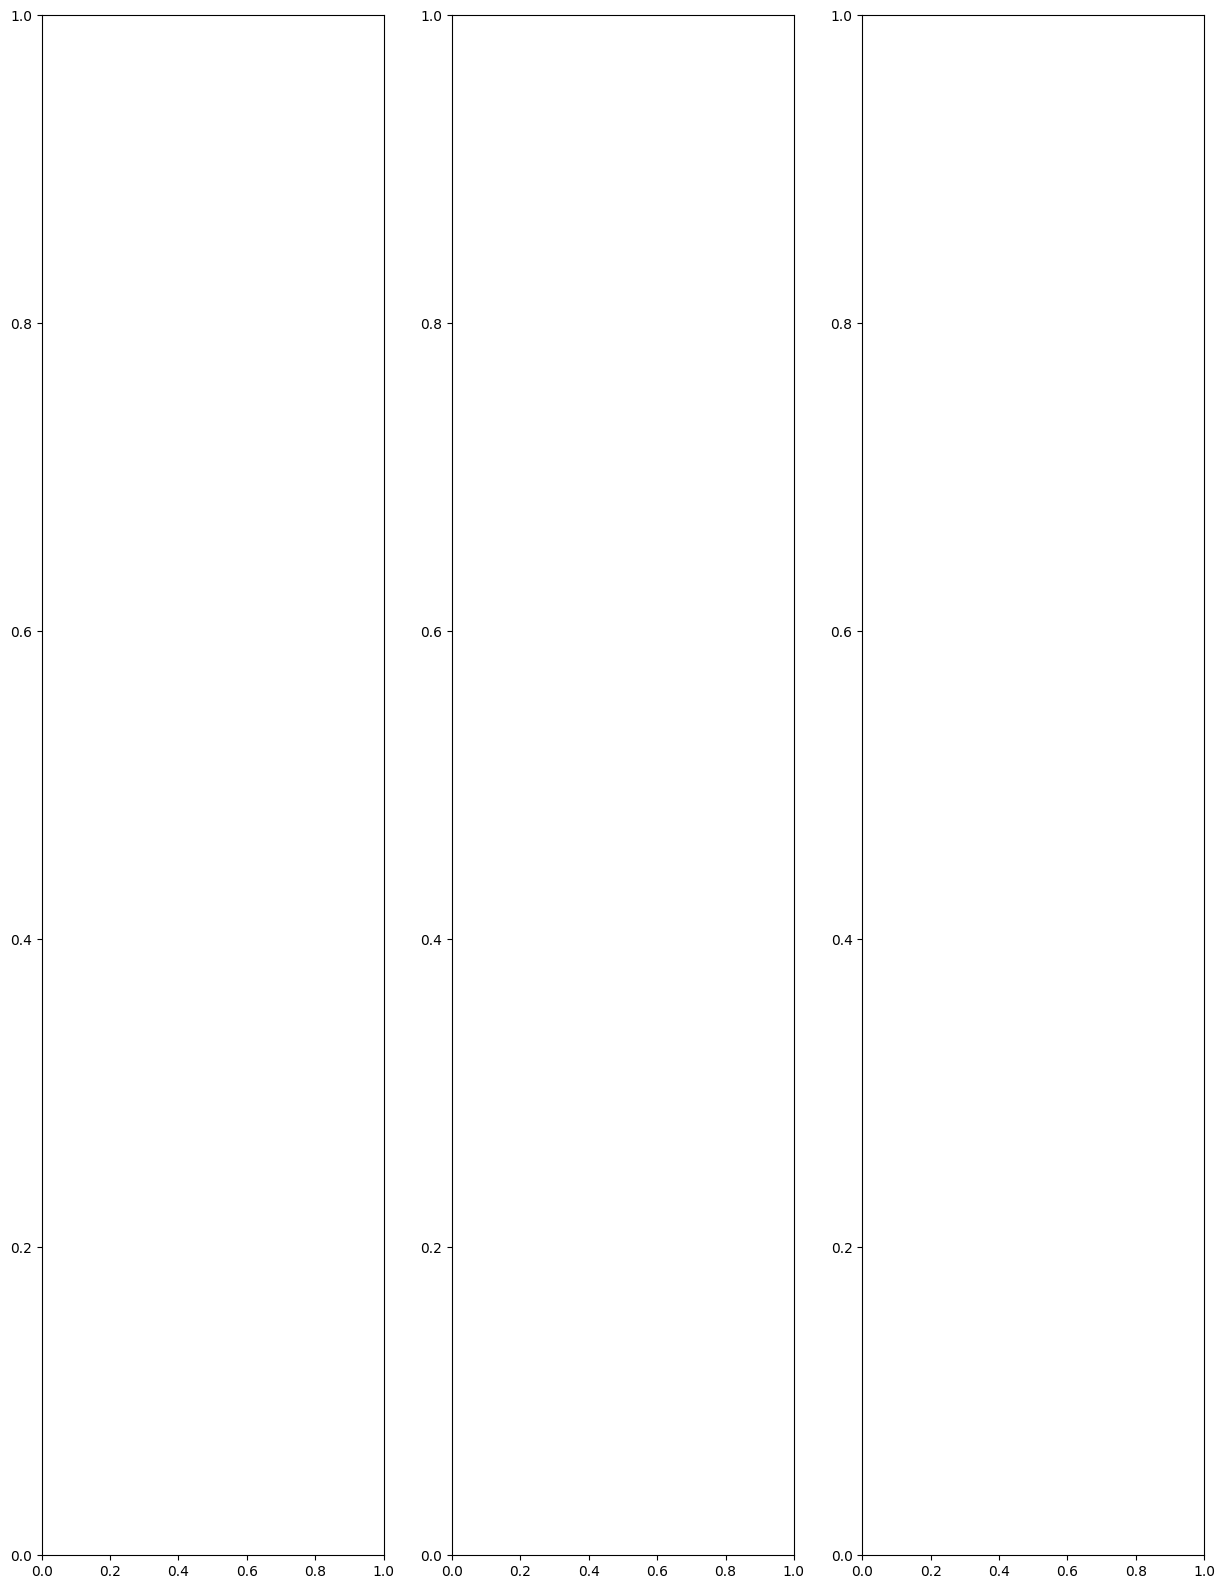

In [10]:
col_X_hot = [['construction_date', 'heating_production', 'heating_emission'], [], []]
col_y = ['surface']
col_X_not_hot = [
    [col[0] for col in dpe_training.dtypes if col[0] not in col_X_hot[0] + col_y ],
    [col[0] for col in dpe_training.dtypes if col[0] not in col_X_hot[1] + col_y],
    [col[0] for col in dpe_training.dtypes if col[0] not in col_X_hot[2] + col_y]
]

hyperparams_models = [
    {
        'max_iter' : [300],
        'C' : [0.1, 1, 10, 100],
    },
    {
        'n_estimators' : [100, 200],
        # 'criterion' : ["squared_error", "absolute_error", "friedman_mse"],
        'max_depth' : [10, 35, None],
        # 'min_samples_split' : [2,5,10],
        # 'min_samples_leaf' : [1,2,3],
        # 'max_features' : ["sqrt", "log2", "auto"]
    },
    {
        'learning_rate' : [0.05, 0.1, 0.2],
        'n_estimators' : [50, 100, 200],
        # 'subsample' : [0.2, 0.5, 0.8, 1],
        # 'criterion' : ['friedman_mse', 'squared_error'],
        'max_depth' : [3, 5, 10],
        # 'max_features' : {'auto', 'sqrt', 'log2'}
        # 'min_samples_split' : [2,5,10],
        # 'min_samples_leaf' : [1,2,3],
    }
]
models = {
    'LogisticRegression' : LogisticRegression,
    'RandomForestClassifier' : RandomForestClassifier,
    'GradientBoostingClassifier' : GradientBoostingClassifier
}
best_models = all_in_one(dpe_training, dictionary, col_X_hot, col_X_not_hot, col_y, False, True, hyperparams_models, models, degree_poly=1, random_state=42, test_size=0.4)


In [ ]:
col_X_hot = [['construction_date', 'heating_production', 'heating_emission'], [], []]
col_y = ['surface']
col_X_not_hot = [
    [col[0] for col in ges_training.dtypes if col[0] not in col_X_hot[0] + col_y ],
    [col[0] for col in ges_training.dtypes if col[0] not in col_X_hot[1] + col_y],
    [col[0] for col in ges_training.dtypes if col[0] not in col_X_hot[2] + col_y]
]

hyperparams_models = [
    {
        'max_iter' : [300],
        'C' : [0.1, 1, 10, 100],
        'class_weight' : ['balanced'],
    },
    {
        'n_estimators' : [100, 200],
        # 'criterion' : ["squared_error", "absolute_error", "friedman_mse"],
        'max_depth' : [10, 35, None],
        'class_weight' : ['balanced'],
        # 'min_samples_split' : [2,5,10],
        # 'min_samples_leaf' : [1,2,3],
        # 'max_features' : ["sqrt", "log2", "auto"]
    },
    {
        'learning_rate' : [0.05, 0.1, 0.2],
        'n_estimators' : [50, 100, 200],
        # 'subsample' : [0.2, 0.5, 0.8, 1],
        # 'criterion' : ['friedman_mse', 'squared_error'],
        'max_depth' : [3, 5, 10],
        # 'max_features' : {'auto', 'sqrt', 'log2'}
        # 'min_samples_split' : [2,5,10],
        # 'min_samples_leaf' : [1,2,3],
    }
]
models = {
    'LogisticRegression' : LogisticRegression,
    'RandomForestClassifier' : RandomForestClassifier,
    'GradientBoostingClassifier' : GradientBoostingClassifier
}
best_models = all_in_one(ges_training, dictionary, col_X_hot, col_X_not_hot, col_y, False, True, hyperparams_models, models, degree_poly=1, random_state=42, test_size=0.4)
